#**Import Libraries, Models ...**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#**1 - Read datasets**

In [6]:
data = pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
data.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


#**Get column names of the dataset**



In [8]:
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']
data[number_features].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#**Ensure all the types of variables before doing training, in the case there are qualitative values, the encoding is applied.**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#**Check for null values**


In [10]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#**PRE-PROCESSING PHASE**

#**Remove outliers from data**

#**Detecting outliers using Box plots**

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

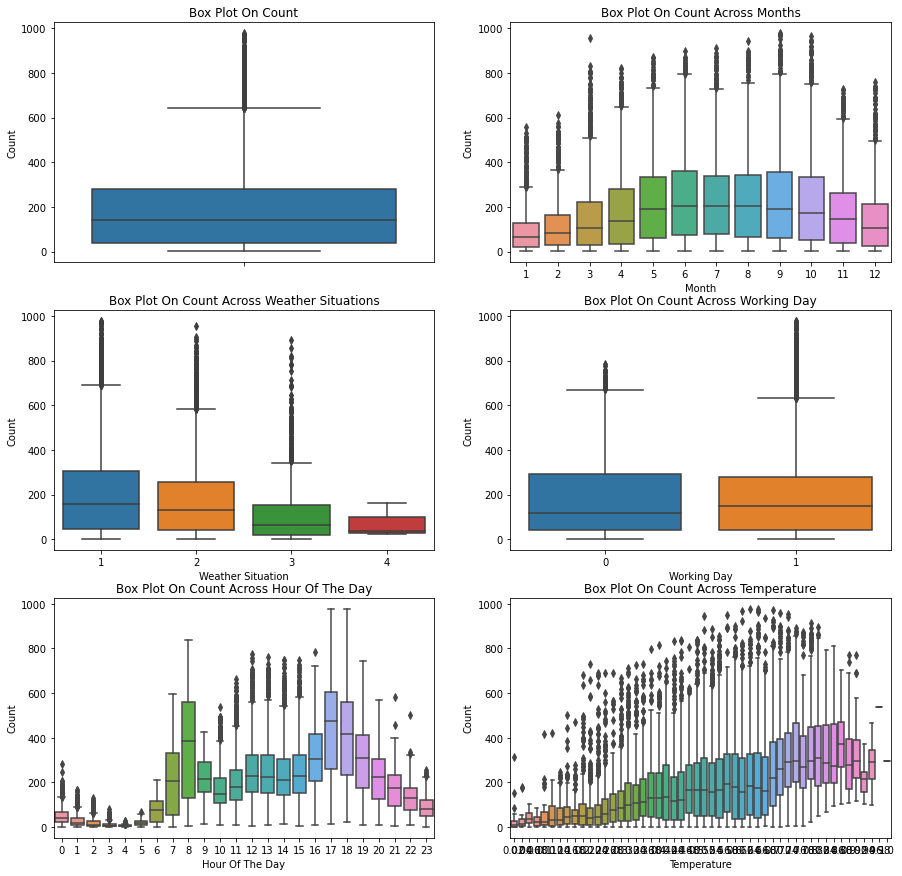

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

#**Remove outliers**

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


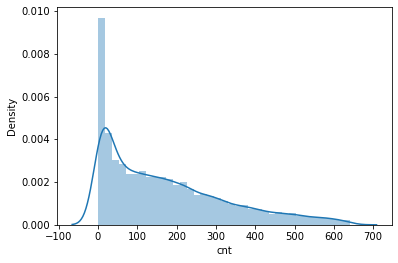

In [12]:
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data.cnt.quantile(0.25)
q3 = data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
data_without_outlier = data.loc[(data.cnt >= lower_bound) & (data.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(data_without_outlier)))

sns.distplot(data_without_outlier.cnt);


In [13]:
data = data_without_outlier

#**Correlation Analysis**

<AxesSubplot:>

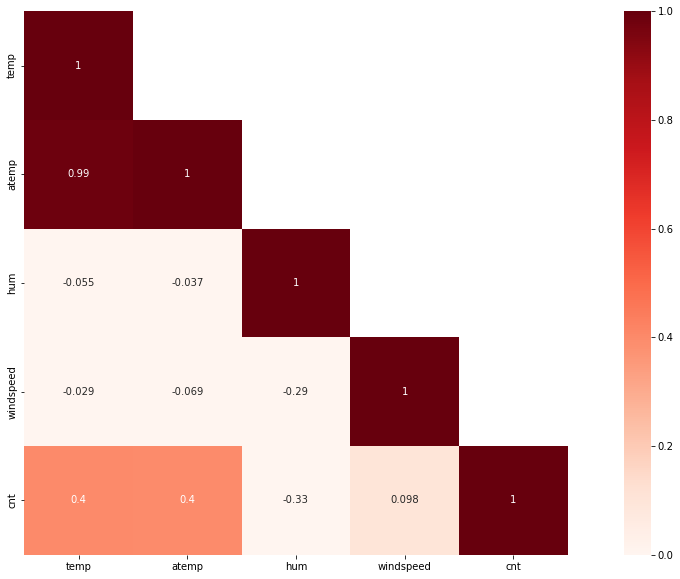

In [14]:
matrix = data[number_features + ['cnt']].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

#**Rename columns to make them more meaningful and readable**


In [15]:
data = data.rename(columns={'yr':'year',
                            'mnth':'month',
                            'weathersit':'weather',
                            'hr':'hour',
                            'hum':'humidity',
                            'cnt':'count'})
data.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


#**Remove features non necessary**


In [16]:
data = data.drop(columns=['instant','dteday','year','casual','registered','atemp'])
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1


#**Dataset normalization**

In [17]:
data = preprocessing.normalize(data)

In [18]:
data =pd.DataFrame(data,columns=['season','month','hour','holiday','weekday','workingday','weather','temp','humidity','windspeed','count'])
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,0.058152,0.058152,0.000000,0.0,0.348912,0.0,0.058152,0.013956,0.047103,0.0,0.930431
1,0.024688,0.024688,0.024688,0.0,0.148128,0.0,0.024688,0.005431,0.019750,0.0,0.987522
2,0.030604,0.030604,0.061208,0.0,0.183624,0.0,0.030604,0.006733,0.024483,0.0,0.979327
3,0.067788,0.067788,0.203363,0.0,0.406726,0.0,0.067788,0.016269,0.050841,0.0,0.881239
4,0.132897,0.132897,0.531587,0.0,0.797381,0.0,0.132897,0.031895,0.099673,0.0,0.132897


#**Implementation**

In [19]:
data =pd.DataFrame(data,columns=['season','month','hour','holiday','weekday','workingday','weather','temp','humidity','windspeed','count'])
y = data['count'] # Outputs
data = data.drop(columns=['count']) # Remove the colon of outputs from datasets
print("Data shape : ", data.shape)
print("Target shape : ", y.shape)

Data shape :  (16874, 10)
Target shape :  (16874,)


In [20]:
#regler les demesions de y
y = np.array(y.values)
y =y.reshape(data.shape[0],1)
print(y.shape)


(16874, 1)


In [21]:
#Add the bias column for our dataset
data = np.hstack((data,np.ones([data.shape[0],1])))
data.shape

(16874, 11)

**Conclusion:** At the end of the descriptive analysis chapter, we can note the following points:

- Casual and registered contain direct information about the bike sharing count which is to predict (data leakage). Therefore they are not considered in the feature set.
- The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "atemp" is dismissed.
The variables "hr" and "temp" seem to be promising features for the bike sharing count prediction.


#**MODEL BUILDING**

In [22]:
Matrice_Models = []

#**Split Dataset into TrainSets, TestSets** 

In [23]:
x_train,x_rest,y_train,y_rest = train_test_split(data,y,test_size = 0.40 ,random_state = 0)
x_valid,x_test,y_valid,y_test = train_test_split(data,y,test_size = 0.50 ,random_state = 0)

In [24]:
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0],1)
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(y_valid.shape[0],1)
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0],1)

# **Lineaire Regression**

In [25]:
Theta = np.random.randn(x_train.shape[1],1)

In [26]:
def model(X,theta):
  return X.dot(theta)

In [27]:
def cost_function(X,y,theta):
  m = len(y)
  return 1/2*m * np.sum((model(X,theta) - y)**2)

In [28]:
cost_function(x_train,y_train,Theta)

94589696.8320229

In [29]:
def grad(X,y,theta):
  m = len(y)
  return 1/m * X.T.dot(model(X,theta) - y)

In [30]:
def gradient_decent(X,y,theta, learning_rate, n_iteration):
  cost_history = np.zeros(n_iteration)
  for i in range(0,n_iteration):
    theta = theta - learning_rate * grad(X,y,theta)
    cost_history[i] = cost_function(X,y,theta)
  return theta, cost_history

In [31]:
def coef_determoination(y,pred):
  y = np.array(y)
  pred = np.array(pred)
  u = ((y- pred)**2).sum()
  v = ((y-y.mean())**2).sum()
  return 1 - u/v

In [32]:
print(x_train.shape)
print(Theta.shape)

(10124, 11)
(11, 1)


In [46]:
Iterations = ['2000', '1000', '1000']
LR = ['0.7', '0.09', '0.3']
i = 0
for iteration, learningRate in zip(Iterations, LR):
  i = i+1
  Theta__Final, cost_history = gradient_decent(x_train,y_train,Theta,learning_rate=float(LR),n_iteration=int(Iterations))
  y_pred_train = model(x_train,Theta__Final)   
  y_pred_valid = model(x_valid,Theta__Final)
  y_pred_test = model(x_test,Theta__Final) 
  # Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
  print('Training coef_determoination ',i,':', coef_determoination(y_train, y_pred_train))
  print('Validation coef_determoination ',i,':', coef_determoination(y_valid, y_pred_valid))
  print('Test coef_determoination ',i,':', coef_determoination(y_test, y_pred_test))
  score_gradient_decent = coef_determoination(y_test, y_pred_test)*100


TypeError: float() argument must be a string or a number, not 'list'

In [ ]:
plt.plot(range(10000), cost_history)

#**Normal Equation in Linear Regression**

In [35]:
theta_best_values=np.linalg.inv(x_train.T.dot(x_train)).dot((x_train.T).dot(y_train))
print(x_train.shape)
print(x_train.T.shape)
print(x_train.T.dot(x_train).shape)
print(np.linalg.inv(x_train.T.dot(x_train)).shape)
print(x_train.T.dot(y_train).shape)
# Display best values obtained.
print(theta_best_values)

(10124, 11)
(11, 10124)
(11, 11)
(11, 11)
(11, 1)
[[-0.01422609]
 [-0.52555954]
 [-0.3430823 ]
 [ 0.33134518]
 [-0.24021539]
 [-0.14432198]
 [-0.31966931]
 [ 2.72532061]
 [-1.03210586]
 [-1.03960624]
 [ 1.05551523]]


In [36]:
y_pred_train = model(x_train,theta_best_values)  
y_pred_valid = model(x_valid,theta_best_values)  
y_pred_test = model(x_test,theta_best_values)  

In [37]:
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', coef_determoination(y_train, y_pred_train))
print('Validation coef_determoination :', coef_determoination(y_valid, y_pred_valid))
print('Test coef_determoination :', coef_determoination(y_test, y_pred_test))
score_equation_normal = coef_determoination(y_test, y_pred_test)*100

Training coef_determoination : 0.8810143356309748
Validation coef_determoination : 0.8806402013004401
Test coef_determoination : 0.8785151723849118


********************************************************************************************

#**Polynomial regression using Sklearn**

In [38]:
polynomial_features = PolynomialFeatures(degree=3)

x_poly = polynomial_features.fit_transform(x_train)
x_poly_valid = polynomial_features.fit_transform(x_valid)
x_poly_test = polynomial_features.fit_transform(x_test)

LinearRegression = LinearRegression()
LinearRegression.fit(x_poly, y_train)
Y_pred = LinearRegression.predict(x_poly_test)
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', LinearRegression.score(x_poly,y_train))
print('Validation coef_determoination :', LinearRegression.score(x_poly_valid,y_valid))
print('Test coef_determoination :', LinearRegression.score(x_poly_test,y_test))
score_polynomial_regression = LinearRegression.score(x_poly_test,y_test)*100

Training coef_determoination : 0.9974987656803157
Validation coef_determoination : 0.9974806301282995
Test coef_determoination : 0.9900800075221171


In [39]:
from sklearn.linear_model import LinearRegression
polynomial_features = PolynomialFeatures(degree=5)

x_poly = polynomial_features.fit_transform(x_train)
x_poly_valid = polynomial_features.fit_transform(x_valid)
x_poly_test = polynomial_features.fit_transform(x_test)

LinearRegression = LinearRegression()
LinearRegression.fit(x_poly, y_train)
Y_pred = LinearRegression.predict(x_poly_test)
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', LinearRegression.score(x_poly,y_train))
print('Validation coef_determoination :', LinearRegression.score(x_poly_valid,y_valid))
print('Test coef_determoination :', LinearRegression.score(x_poly_test,y_test))
score_polynomial_regression = LinearRegression.score(x_poly_test,y_test)*100

Training coef_determoination : 0.9999779544873428
Validation coef_determoination : 0.9999783503673187
Test coef_determoination : -114145.39132984969


********************************************************************************************

#**SVR**

In [40]:
modelsk = SVR(C=100)
modelsk.fit(x_train,y_train)
print('Training coef_determoination :', modelsk.score(x_train,y_train))
print('Validation coef_determoination :', modelsk.score(x_valid,y_valid))
print('Test coef_determoination :', modelsk.score(x_test,y_test))
score_svr = modelsk.score(x_test,y_test)*100

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training coef_determoination : 0.9396268322945328
Validation coef_determoination : 0.9390337137867694
Test coef_determoination : 0.9401175805582439


#**ANN**

In [41]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor((150,150,150), random_state=1, max_iter=100).fit(x_train, y_train)
print('Training coef_determoination :', regr.score(x_train, y_train))
print('Validation coef_determoination :', regr.score(x_valid, y_valid))
print('Test coef_determoination :', regr.score(x_test, y_test))
score_ann = regr.score(x_test,y_test)*100

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training coef_determoination : 0.9975896094929851
Validation coef_determoination : 0.9975682457068182
Test coef_determoination : 0.9974570514894026


In [42]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor((150), random_state=1, max_iter=100).fit(x_train, y_train)
print('Training coef_determoination :', regr.score(x_train, y_train))
print('Validation coef_determoination :', regr.score(x_valid, y_valid))
print('Test coef_determoination :', regr.score(x_test, y_test))
score_ann = regr.score(x_test,y_test)*100

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training coef_determoination : 0.985791061560694
Validation coef_determoination : 0.9854301078867203
Test coef_determoination : 0.9848027309206034


In [43]:
Scores = [score_gradient_decent, score_equation_normal, score_polynomial_regression, score_svr, score_ann] 
Scores

NameError: name 'score_gradient_decent' is not defined

In [ ]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
x = [1, 2, 3, 4, 5]  
# heights of bars 
y = [score_gradient_decent, score_equation_normal, score_polynomial_regression, score_svr, score_ann] 
  
# labels for bars 
tick_label =  ["GD", "EN", "POL", "SVR", "ANN"] 
  
# plotting a bar chart 
plt.bar(x, y, tick_label = tick_label, 
        width = 0.5, color = ['black', 'black','black','black','red']) 
  
# naming the x-axis 
plt.xlabel('Models') 
# naming the y-axis 
plt.ylabel('Scores') 
# plot title 
plt.title('Models Comparaison') 
  
# function to show the plot 
plt.show()

#**Experience without Preprocessing phase**

In [ ]:
dataNP = pd.read_csv('hour.csv')
dataNP

In [ ]:
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

In [ ]:
print("Samples in train set with outliers: {}".format(len(dataNP)))
q1 = dataNP.cnt.quantile(0.25)
q3 = dataNP.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
data_without_outlier = dataNP.loc[(dataNP.cnt >= lower_bound) & (dataNP.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(data_without_outlier)))

sns.distplot(data_without_outlier.cnt);


In [ ]:
dataNP = dataNP.rename(columns={'yr':'year',
                            'mnth':'month',
                            'weathersit':'weather',
                            'hr':'hour',
                            'hum':'humidity',
                            'cnt':'count'})

In [ ]:
dataNP =pd.DataFrame(dataNP,columns=['season','month','hour','holiday','weekday','workingday','weather','temp','humidity','windspeed','count'])
dataNP.head()

In [ ]:
dataNP = data_without_outlier

In [ ]:
dataNP = np.array(dataNP)

In [ ]:
yNP = dataNP[:,-1] # Outputs
dataNP = dataNP[:,:-2] # Remove the coloumn of outputs from datasets
print("Data shape : ", dataNP.shape)
print("Target shape : ", yNP.shape)

In [ ]:
#regler les demesions de y
yNP = np.array(yNP)
yNP =yNP.reshape(dataNP.shape[0],1)
print(yNP.shape)

In [ ]:
#Add the bias column for our dataset
dataNP = np.hstack((data,np.ones([data.shape[0],1])))
dataNP.shape

In [ ]:
x_trainNP,x_restNP,y_trainNP,y_restNP = train_test_split(dataNP,yNP,test_size = 0.40 ,random_state = 0)
x_validNP,x_testNP,y_validNP,y_testNP = train_test_split(dataNP,yNP,test_size = 0.50 ,random_state = 0)

In [ ]:
y_trainNP = np.array(y_trainNP)
y_trainNP = y_trainNP.reshape(y_trainNP.shape[0],1)
y_validNP = np.array(y_validNP)
y_validNP = y_validNP.reshape(y_validNP.shape[0],1)
y_testNP = np.array(y_testNP)
y_testNP = y_testNP.reshape(y_testNP.shape[0],1)

#**Lineaire Regression**

In [ ]:
ThetaNP = np.random.randn(x_trainNP.shape[1],1)

In [ ]:
cost_function(x_trainNP,y_trainNP,ThetaNP)

In [ ]:
print(x_trainNP.shape)
print(ThetaNP.shape)

In [ ]:
Theta__FinalNP, cost_historyNP = gradient_decent(x_trainNP,y_trainNP,ThetaNP,learning_rate=0.7,n_iteration=10000)

In [ ]:
y_pred_trainNP = model(x_trainNP,Theta__FinalNP)   
y_pred_validNP = model(x_validNP,Theta__FinalNP)
y_pred_testNP = model(x_testNP,Theta__FinalNP) 

In [ ]:
plt.plot(range(10000), cost_historyNP)

In [ ]:
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', coef_determoination(y_trainNP, y_pred_trainNP))
print('Validation coef_determoination :', coef_determoination(y_validNP, y_pred_validNP))
print('Test coef_determoination :', coef_determoination(y_testNP, y_pred_testNP))
score_gradient_decentNP = coef_determoination(y_testNP, y_pred_testNP)*100

#**Polynomial regression using Sklearn**

In [ ]:
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=3)
x_polyNP = polynomial_features.fit_transform(x_trainNP)
x_poly_validNP = polynomial_features.fit_transform(x_validNP)
x_poly_testNP = polynomial_features.fit_transform(x_testNP)

LinearRegressionNP = LinearRegression()
LinearRegressionNP.fit(x_polyNP, y_trainNP)
Y_predNP = LinearRegressionNP.predict(x_poly_testNP)
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', LinearRegressionNP.score(x_polyNP,y_trainNP))
print('Validation coef_determoination :', LinearRegressionNP.score(x_poly_validNP,y_validNP))
print('Test coef_determoination :', LinearRegressionNP.score(x_poly_testNP,y_testNP))
score_polynomial_regression = LinearRegressionNP.score(x_poly_testNP,y_testNP)*100

#**SVR**

In [ ]:
modelsk = SVR(C=100)
modelsk.fit(x_trainNP,y_trainNP)
print('Training coef_determoination :', modelsk.score(x_trainNP,y_trainNP))
print('Validation coef_determoination :', modelsk.score(x_validNP,y_validNP))
print('Test coef_determoination :', modelsk.score(x_testNP,y_testNP))
score_svr = modelsk.score(x_testNP,y_testNP)*100

#**ANN**

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor((150,150,150), random_state=1, max_iter=100).fit(x_trainNP, y_trainNP)
print('Training coef_determoination :', regr.score(x_trainNP, y_trainNP))
print('Validation coef_determoination :', regr.score(x_validNP, y_validNP))
print('Test coef_determoination :', regr.score(x_testNP, y_testNP))
score_ann = regr.score(x_testNP,y_testNP)*100

#**Normal Equation in Linear Regression**

In [ ]:
theta_best_valuesNP=np.linalg.inv(x_trainNP.T.dot(x_trainNP)).dot((x_trainNP.T).dot(y_trainNP))
print(x_trainNP.shape)
print(x_trainNP.T.shape)
print(x_trainNP.T.dot(x_trainNP).shape)
print(np.linalg.inv(x_trainNP.T.dot(x_trainNP)).shape)
print(x_trainNP.T.dot(y_trainNP).shape)
# Display best values obtained.
print(theta_best_valuesNP)
y_pred_trainNP = model(x_trainNP,theta_best_valuesNP)  
y_pred_validNP = model(x_validNP,theta_best_valuesNP)  
y_pred_testNP = model(x_testNP,theta_best_valuesNP)
# Calculation of Mean Squared Error (MSE)mean_squared_error(Y_true,Y_pred)
print('Training coef_determoination :', coef_determoination(y_trainNP, y_pred_trainNP))
print('Validation coef_determoination :', coef_determoination(y_validNP, y_pred_validNP))
print('Test coef_determoination :', coef_determoination(y_testNP, y_pred_testNP))
score_equation_normal = coef_determoination(y_testNP, y_pred_testNP)*100 